In [ ]:
import numpy as np
import pandas as pd

In [37]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [38]:
df.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Label Encoding**

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
df['gender'] = le.fit_transform(df['gender'])
df['country'] = le.fit_transform(df['country'])

In [41]:
df.head(3)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1


### **EDA**

In [42]:
corr = df.corr()

In [43]:
corr

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.006516,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
gender,-0.002641,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,0.009497,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128


<Axes: >

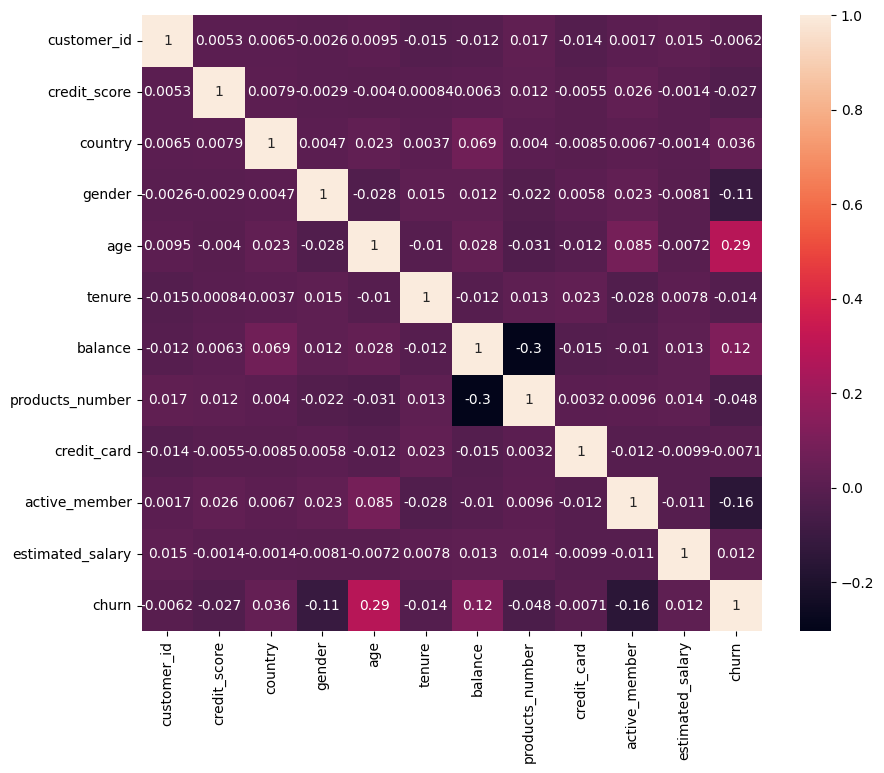

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cbar=True)



In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


<Axes: xlabel='credit_card', ylabel='Count'>

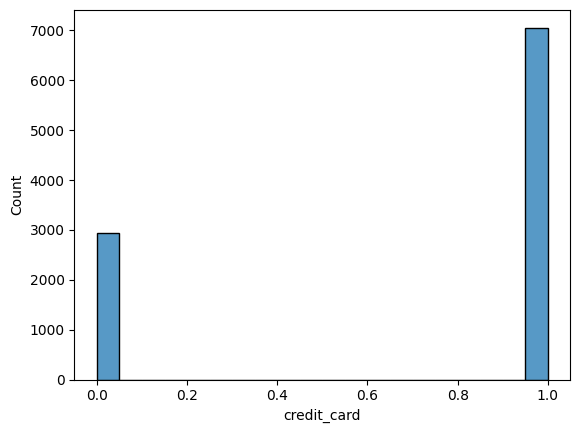

In [46]:
sns.histplot(df['credit_card'],bins=20)

<Axes: ylabel='age'>

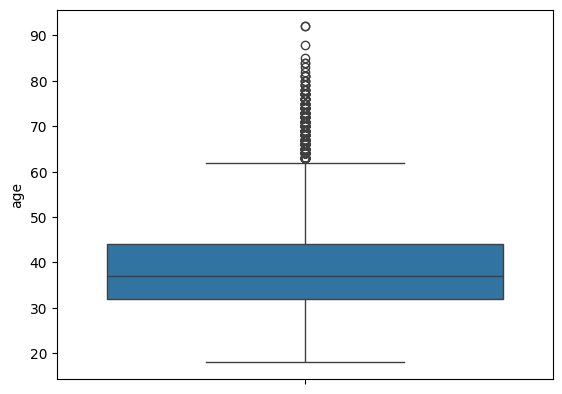

In [47]:
sns.boxplot(df['age'])


<Axes: xlabel='gender', ylabel='count'>

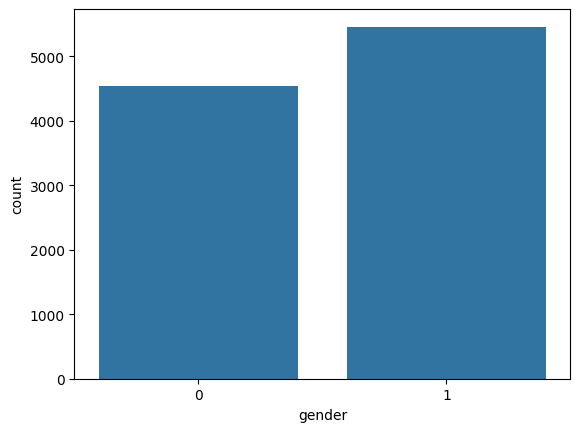

In [48]:
sns.countplot(x=df['gender'])

# **Train Test Split**

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df.drop(['churn','customer_id'],axis=1)
y = df['churn']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Standardization**

In [52]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

In [53]:
X_train = sclr.fit_transform(X_train)
X_test = sclr.fit_transform(X_test)

# **Model Training**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [55]:
models = {
    'lg':LogisticRegression(),
    'dtc':DecisionTreeClassifier(),
    'rfc':RandomForestClassifier(),
}

In [56]:
for name,model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(f"{name} with accuracy : {accuracy_score(y_test,ypred)} ")

lg with accuracy : 0.8155 
dtc with accuracy : 0.7855 
rfc with accuracy : 0.8695 


# **Model Selection**

In [57]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = model.predict(X_test)

# **Prediction System**

In [58]:
def prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary):
    features = np.array([[credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary]])
    features = sclr.fit_transform(features)
    prediction = rfc.predict(features).reshape(1,-1)
    return prediction[0]
credit_score = 608
country = 2
gender = 0
age= 41
tenure= 1
balance = 83807.86
products_number= 1
credit_card = 0
active_member =1
estimated_salary = 112542.58

pred  = prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary)

In [59]:
if pred == 1:
    print("he left the compnay")
else:
    print("he is there still")



he is there still


In [60]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(rfc,open('rfc.pkl','wb'))

In [61]:
!pip install streamlit

In [62]:
%%writefile app.py


import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle

# Load models
df = pickle.load(open('df.pkl', 'rb'))
rfc = pickle.load(open('rfc.pkl', 'rb'))

# Create a StandardScaler instance
sclr = StandardScaler()

def validate_input(value, error_message):
    if value == '':
        st.error(error_message)
        return None
    return value

def prediction(credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary):
    # Validate input
    credit_score = validate_input(credit_score, "Please provide a valid credit score.")
    country = validate_input(country, "Please provide a valid country.")
    gender = validate_input(gender, "Please provide a valid gender.")
    age = validate_input(age, "Please provide a valid age.")
    tenure = validate_input(tenure, "Please provide a valid tenure.")
    balance = validate_input(balance, "Please provide a valid balance.")
    products_number = validate_input(products_number, "Please provide a valid number of products.")
    credit_card = validate_input(credit_card, "Please provide a valid credit card status.")
    active_member = validate_input(active_member, "Please provide a valid active member status.")
    estimated_salary = validate_input(estimated_salary, "Please provide a valid estimated salary.")

    if any(value is None for value in [credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary]):
        return None

    # Process features
    features = np.array([[float(credit_score), country, gender, float(age), float(tenure), float(balance), float(products_number), float(credit_card), float(active_member), float(estimated_salary)]])
    features[:, 1] = sclr.fit_transform(features[:, 1].reshape(-1, 1))  # Scale the country column

    # Make prediction
    prediction = rfc.predict(features).reshape(1, -1)
    return prediction[0]

# Web app
st.title('Bank Customer Churn Prediction')

# Input fields
credit_score = st.number_input('Credit Score')
country = st.text_input('Country')
gender = st.text_input('Gender')
age = st.number_input('Age')
tenure = st.number_input('Tenure')
balance = st.number_input('Balance')
products_number = st.number_input('Products Number')
credit_card = st.number_input('Credit Card')
active_member = st.number_input('Active Member')
estimated_salary = st.number_input('Estimated Salary')

# Prediction button
if st.button('Predict'):
    pred = prediction(credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary)

    if pred is not None:
        result_message = "The customer has left." if pred == 1 else "The customer is still active."
        st.write(result_message)

Writing app.py


In [63]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 1.187s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [64]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.71.44.226


In [ ]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501

npx: installed 22 in 3.502s
your url is: https://bitter-dragons-tease.loca.lt
